In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random

df=pd.read_csv('/content/drive/MyDrive/ml mini proj mtech/deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
df['source'].unique()


array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

<Axes: xlabel='deceptive', ylabel='count'>

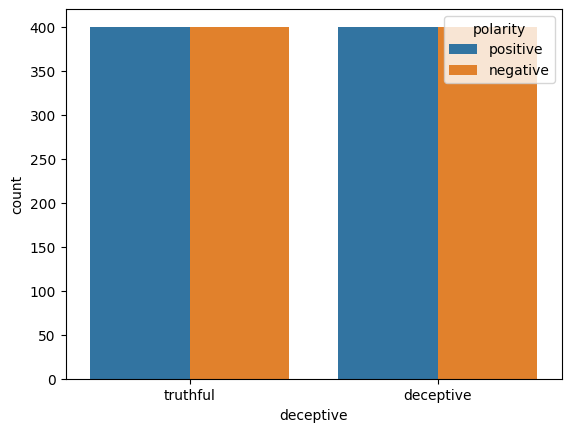

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)


<Axes: xlabel='deceptive', ylabel='count'>

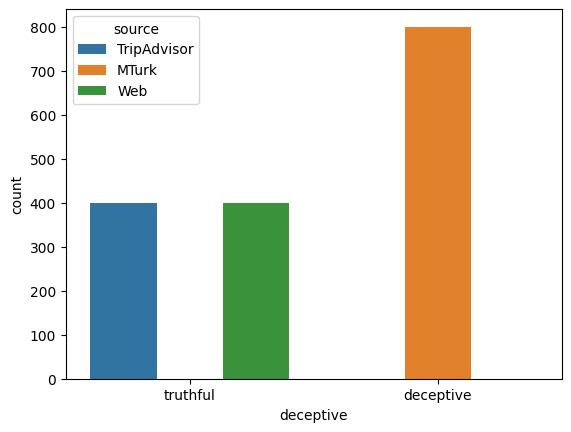

In [ ]:
sns.countplot(x=df['deceptive'],hue='source',data=df)


<Axes: xlabel='deceptive', ylabel='count'>

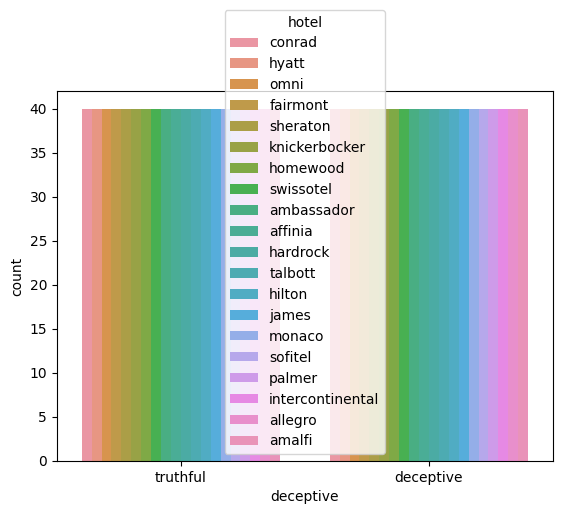

In [ ]:

sns.countplot(x=df['deceptive'],hue='hotel',data=df)

In [ ]:

#drop the feature hotel
df=df.drop(['hotel'],axis=1)
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text
df['text']=df['text'].apply(text_cleaning)

In [ ]:
df['complete_text']= df['text']

In [ ]:
deceptive_opinions_df = df['complete_text']

In [ ]:
print(deceptive_opinions_df)

0       we stayed for a one night getaway with family ...
1       triple a rate with upgrade to view room was le...
2       this comes a little late as i m finally catchi...
3       the omni chicago really delivers on all fronts...
4       i asked for a high floor away from the elevato...
                              ...                        
1595    problems started when i booked the intercontin...
1596    the amalfi hotel has a beautiful website and i...
1597    the intercontinental chicago magnificent mile ...
1598    the palmer house hilton  while it looks good i...
1599    as a former chicagoan  i m appalled at the ama...
Name: complete_text, Length: 1600, dtype: object


In [ ]:
# Function to add noise to the dataset
def add_noise(text):
    # Simulate adding noise by inserting random words
    noise_words = ["random", "nonsense", "irrelevant", "misleading"]
    num_noise_words = random.randint(1, 3)
    for _ in range(num_noise_words):
        text += f" {random.choice(noise_words)}"
    return text

In [ ]:
# Apply noise addition to the 'text' column
deceptive_opinions_df['text_with_noise'] = deceptive_opinions_df.apply(add_noise)

In [ ]:
# Function to perform noise removal
def remove_noise(text):
    # Assuming you have already performed basic preprocessing (lowercasing, stopwords removal, etc.)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove noise words
    noise_words = ["random", "nonsense", "irrelevant", "misleading"]
    tokens = [token for token in tokens if token.lower() not in noise_words]

    # Joining tokens back into clean text
    clean_text = ' '.join(tokens)
    return clean_text

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

# Apply noise removal to the 'text_with_noise' column
deceptive_opinions_df['text_cleaned'] = deceptive_opinions_df['text_with_noise'].apply(remove_noise)

print("\nText with Noise:")
print(deceptive_opinions_df['text_with_noise'])
print("\nText after Noise Removal:")
print(deceptive_opinions_df['text_cleaned'])


Text with Noise:
0       we stayed for a one night getaway with family ...
1       triple a rate with upgrade to view room was le...
2       this comes a little late as i m finally catchi...
3       the omni chicago really delivers on all fronts...
4       i asked for a high floor away from the elevato...
                              ...                        
1595    problems started when i booked the intercontin...
1596    the amalfi hotel has a beautiful website and i...
1597    the intercontinental chicago magnificent mile ...
1598    the palmer house hilton  while it looks good i...
1599    as a former chicagoan  i m appalled at the ama...
Name: complete_text, Length: 1600, dtype: object

Text after Noise Removal:
0       we stayed for a one night getaway with family ...
1       triple a rate with upgrade to view room was le...
2       this comes a little late as i m finally catchi...
3       the omni chicago really delivers on all fronts...
4       i asked for a high floor awa

In [ ]:
x=df['complete_text']
y=df['deceptive']

one hot encoding and Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

count_vectorizer = TfidfVectorizer()

# Transform the text data into one-hot encoded features
X_train_tfidf = count_vectorizer.fit_transform(X_train)
X_test_tfidf = count_vectorizer.transform(X_test)
# Use OneHotEncoder for the 'label' column
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))






/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_tfidf.shape

(1280, 8440)

In [ ]:
y_train_encoded.shape

(1280, 1)

In [ ]:
X_test_tfidf.shape

(320, 8440)

In [ ]:
y_test_encoded.shape

(320, 1)

In [ ]:
#Logistic regression
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test_tfidf)


In [ ]:

# Convert predictions back to original class labels
#predicted_labels = label_encoder.inverse_transform(logistic_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_matrix_results = confusion_matrix(y_test, logistic_predictions)
print("Confusion Matrix:")
print(confusion_matrix_results)

Accuracy: 0.865625
Confusion Matrix:
[[138  14]
 [ 29 139]]


In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_tfidf, y_train_encoded)
linear_regression_predictions = linear_regression_model.predict(X_test_tfidf)
linear_regression_predictions = [1 if pred > 0.5 else 0 for pred in linear_regression_predictions]
print("Linear Regression Accuracy:", accuracy_score(y_test_encoded, linear_regression_predictions))


Linear Regression Accuracy: 0.846875


In [ ]:
# Lasso Regression
lasso_regression_model = Lasso(alpha=0.1)
lasso_regression_model.fit(X_train_tfidf, y_train_encoded)
lasso_regression_predictions = lasso_regression_model.predict(X_test_tfidf)
lasso_regression_predictions = [1 if pred > 0.5 else 0 for pred in lasso_regression_predictions]
print("Lasso Regression Accuracy:", accuracy_score(y_test_encoded, lasso_regression_predictions))

Lasso Regression Accuracy: 0.475


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

# Assuming you already have X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded

# Ridge Regression
ridge_regression_model = Ridge(alpha=0.1)
ridge_regression_model.fit(X_train_tfidf, y_train_encoded)
ridge_regression_predictions = ridge_regression_model.predict(X_test_tfidf)
ridge_regression_predictions = [1 if pred > 0.5 else 0 for pred in ridge_regression_predictions]
print("Ridge Regression Accuracy:", accuracy_score(y_test_encoded, ridge_regression_predictions))


Ridge Regression Accuracy: 0.86875


In [ ]:
# K-Means clustering with SVM
from sklearn.cluster import KMeans
from sklearn.svm import SVC
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train_tfidf)

# Assign clusters to the training and testing data
X_train_clusters = kmeans_model.predict(X_train_tfidf)
X_test_clusters = kmeans_model.predict(X_test_tfidf)

# SVM classifier on cluster assignments
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict using the SVM classifier
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Accuracy assessment
print("SVM Accuracy:", accuracy_score(y_test_encoded, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, svm_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.88125
Confusion Matrix:
[[138  14]
 [ 24 144]]


In [ ]:
#kmeans with knn
from sklearn.neighbors import KNeighborsClassifier
# K-Means clustering
kmeans_model = KMeans(n_clusters=2, random_state=42)
X_train_clusters = kmeans_model.fit_predict(X_train_tfidf)
X_test_clusters = kmeans_model.predict(X_test_tfidf)

# KNN classifier on cluster assignments
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict using the KNN classifier
knn_predictions = knn_classifier.predict(X_test_tfidf)

# Accuracy assessment
print("KNN Accuracy:", accuracy_score(y_test_encoded, knn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, knn_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.684375
Confusion Matrix:
[[135  17]
 [ 84  84]]


SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Initialize and train the logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
conf_matrix = confusion_matrix(y_test, logistic_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.871875
Confusion Matrix:
 [[138  14]
 [ 27 141]]


In [ ]:
X_train_resampled[:5]

<5x8440 sparse matrix of type '<class 'numpy.float64'>'
	with 305 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf.shape

(320, 8440)

In [ ]:
X_train_tfidf.shape

(1280, 8440)